In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
from google.colab import files

uploaded = files.upload()


Saving FAOSTAT_data_en_11-1-2025 (2).csv to FAOSTAT_data_en_11-1-2025 (2).csv
Saving FAOSTAT_data_en_11-1-2025.csv to FAOSTAT_data_en_11-1-2025.csv


Load Dataset

In [3]:
# Replace filename if needed
df = pd.read_csv('FAOSTAT_data_en_11-1-2025.csv')

# Preview data
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,1.1998,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,33.4734,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,1962,1962,3050,FAO TIER 1,kt,1.2111,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,1962,1962,3050,FAO TIER 1,kt,33.5933,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,1963,1963,3050,FAO TIER 1,kt,1.1384,E,Estimated value,NaN


Dataset Overview

In [4]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Data types & nulls
df.info()


Dataset Shape: (1008, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1008 non-null   object 
 1   Domain            1008 non-null   object 
 2   Area Code (M49)   1008 non-null   int64  
 3   Area              1008 non-null   object 
 4   Element Code      1008 non-null   int64  
 5   Element           1008 non-null   object 
 6   Item Code (CPC)   1008 non-null   object 
 7   Item              1008 non-null   object 
 8   Year Code         1008 non-null   int64  
 9   Year              1008 non-null   int64  
 10  Source Code       1008 non-null   int64  
 11  Source            1008 non-null   object 
 12  Unit              1008 non-null   object 
 13  Value             1008 non-null   float64
 14  Flag              1008 non-null   object 
 15  Flag Description  1008 non-null   object 
 16  Note            

Column Understanding

In [5]:
df.columns


Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Source Code', 'Source', 'Unit', 'Value', 'Flag', 'Flag Description',
       'Note'],
      dtype='object')

Missing Value Analysis

In [6]:
df.isnull().sum()


,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),0
Item,0
Year Code,0
Year,0


Unique Value Exploration

In [7]:
print("Countries:", df['Area'].nunique())
print("Items:", df['Item'].nunique())
print("Emission Elements:", df['Element'].unique())
print("Year Range:", df['Year'].min(), "-", df['Year'].max())


Countries: 8
Items: 1
Emission Elements: ['Crops total (Emissions N2O)' 'Crops total (Emissions CH4)']
Year Range: 1961 - 2023


Target Variable Distribution

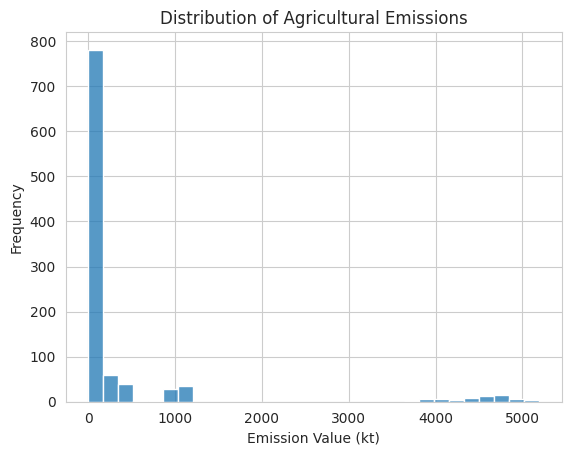

In [8]:
plt.figure()
sns.histplot(df['Value'], bins=30)
plt.title("Distribution of Agricultural Emissions")
plt.xlabel("Emission Value (kt)")
plt.ylabel("Frequency")
plt.show()


Emissions Over Time (Global Trend)

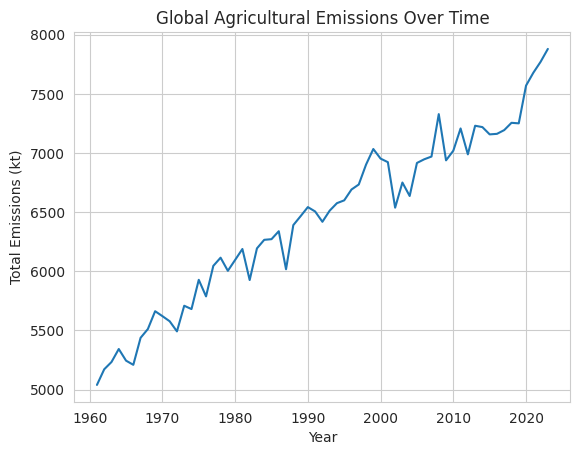

In [9]:
yearly_emissions = df.groupby('Year')['Value'].sum()

plt.figure()
plt.plot(yearly_emissions)
plt.title("Global Agricultural Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions (kt)")
plt.show()


Top Emitting Countries

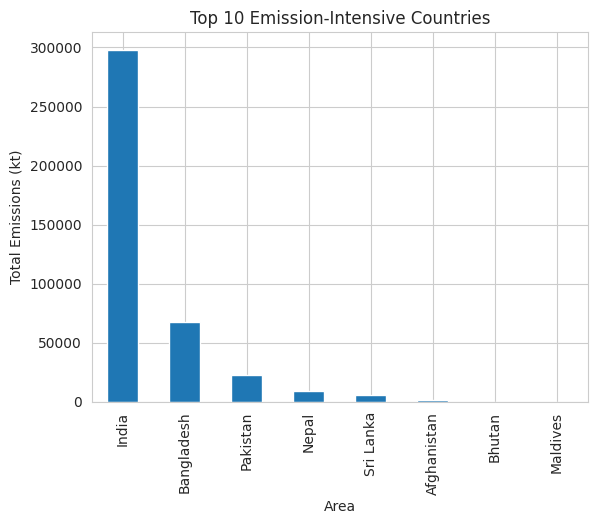

In [10]:
top_countries = df.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Emission-Intensive Countries")
plt.ylabel("Total Emissions (kt)")
plt.show()


Feature Engineering - Extract Emission Type (CH₄ / N₂O)

In [11]:
df['emission_type'] = df['Element'].apply(
    lambda x: 'CH4' if 'CH4' in x else ('N2O' if 'N2O' in x else 'Other')
)

df[['Element', 'emission_type']].drop_duplicates()


,Element,emission_type
0,Crops total (Emissions N2O),N2O
1,Crops total (Emissions CH4),CH4


Create Decade Feature

In [12]:
df['decade'] = (df['Year'] // 10) * 10

df[['Year', 'decade']].drop_duplicates().head()


,Year,decade
0,1961,1960
2,1962,1960
4,1963,1960
6,1964,1960
8,1965,1960


Emission Intensity (Hotspot Proxy)

In [13]:
df['emission_intensity'] = df.groupby(
    ['Area', 'Item', 'emission_type']
)['Value'].transform(lambda x: x / x.mean())

df[['Area', 'Item', 'emission_intensity']].head()


,Area,Item,emission_intensity
0,Afghanistan,All Crops,0.642578
1,Afghanistan,All Crops,1.186181
2,Afghanistan,All Crops,0.648630
3,Afghanistan,All Crops,1.190430
4,Afghanistan,All Crops,0.609694


Rolling 5-Year Trend Feature

In [14]:
df = df.sort_values('Year')

df['rolling_5yr_mean'] = df.groupby(
    ['Area', 'Item', 'emission_type']
)['Value'].transform(lambda x: x.rolling(5, min_periods=1).mean())

df[['Year', 'Value', 'rolling_5yr_mean']].head()


,Year,Value,rolling_5yr_mean
883,1961,53.6490,53.6490
882,1961,1.1077,1.1077
1,1961,33.4734,33.4734
0,1961,1.1998,1.1998
757,1961,178.7986,178.7986


CH₄ vs N₂O Comparison

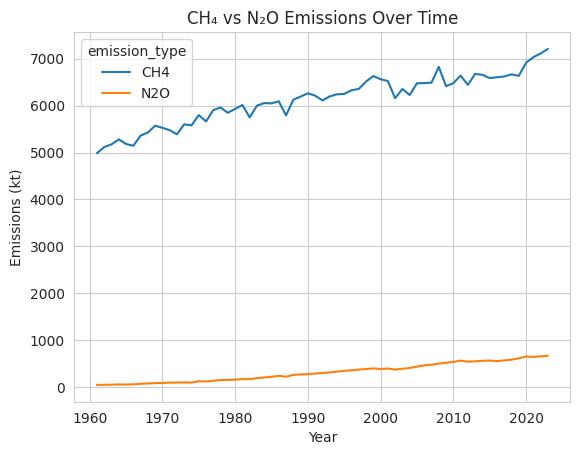

In [15]:
gas_trends = df.groupby(['Year', 'emission_type'])['Value'].sum().reset_index()

plt.figure()
sns.lineplot(data=gas_trends, x='Year', y='Value', hue='emission_type')
plt.title("CH₄ vs N₂O Emissions Over Time")
plt.ylabel("Emissions (kt)")
plt.show()


Crop-Level Emission Analysis

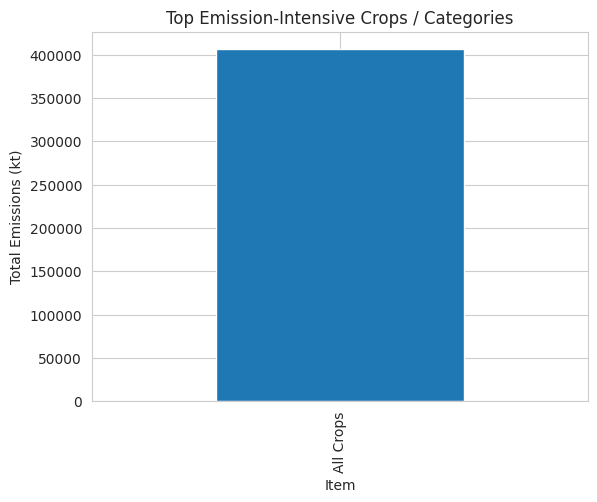

In [18]:
top_items = df.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_items.plot(kind='bar')
plt.title("Top Emission-Intensive Crops / Categories")
plt.ylabel("Total Emissions (kt)")
plt.show()


Final Engineered Dataset Preview

In [19]:
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note,emission_type,decade,emission_intensity,rolling_5yr_mean
883,GCE,Emissions from Crops,144,Sri Lanka,72440,Crops total (Emissions CH4),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,53.6490,E,Estimated value,NaN,CH4,1960,0.607107,53.6490
882,GCE,Emissions from Crops,144,Sri Lanka,72430,Crops total (Emissions N2O),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,1.1077,E,Estimated value,NaN,N2O,1960,0.364813,1.1077
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,33.4734,E,Estimated value,NaN,CH4,1960,1.186181,33.4734
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,1.1998,E,Estimated value,NaN,N2O,1960,0.642578,1.1998
757,GCE,Emissions from Crops,586,Pakistan,72440,Crops total (Emissions CH4),F1712,All Crops,1961,1961,3050,FAO TIER 1,kt,178.7986,E,Estimated value,NaN,CH4,1960,0.557662,178.7986


Save Engineered Dataset

In [20]:
df.to_csv("agriculture_emissions_engineered.csv", index=False)

print("Feature-engineered dataset saved successfully")


Feature-engineered dataset saved successfully
